In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [2]:
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator

In [ ]:
adata = sc.read_h5ad("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/40_gex_surface_prot/13_january_2025/mapped_data/mapped_til_colon.h5ad")

In [4]:
adata.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier,leiden_res0_25,leiden_res0_5,leiden_res1,functional.cluster
AAACCTGAGTTAAGTG_1_10mix1,0,0,0,1,CD8_NaiveLike,10mix,singlet,False,False,False,...,86.830162,605.018494,0,False,False,False,4,4,6,NaN
AAACCTGCAGGATCGA_1_10mix1,0,0,0,1,CD8_Tex,10mix,singlet,False,False,False,...,75.581802,587.908875,0,False,False,False,3,3,2,NaN
AAACCTGCATAACCTG_1_10mix1,0,0,0,1,CD8_Tex,10mix,singlet,False,False,False,...,86.354584,287.226318,0,False,False,False,3,3,14,NaN
AAACCTGCATACCATG_1_10mix1,0,0,0,1,CD8_EarlyActiv,10mix,singlet,False,False,False,...,82.344032,258.087860,0,False,False,False,3,3,2,NaN
AAACCTGGTGTGCCTG_1_10mix1,0,0,0,1,CD8_NaiveLike,10mix,singlet,False,False,False,...,94.393898,697.110291,0,False,False,False,3,3,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,0,0,7,ICI2,CD8_Tex,GF-plus,singlet,False,False,False,...,83.939003,658.834290,0,False,False,False,0,0,4,CD8_Tex
TTTGTCATCGTTGCCT_1_GF_ICI2_plus,0,0,7,ICI2,CD8_Tex,GF-plus,singlet,False,False,False,...,84.472771,641.084961,0,False,False,False,0,6,10,CD8_Tex
TTTGTCATCTAACTGG_1_GF_ICI2_plus,0,0,7,ICI2,CD8_Tex,GF-plus,singlet,False,False,False,...,35.431831,378.922791,0,False,False,False,2,2,1,CD8_Tex
TTTGTCATCTCTGTCG_1_GF_ICI2_plus,0,0,7,ICI2,CD8_Tex,GF-plus,singlet,False,False,False,...,44.855644,628.218262,0,False,False,False,0,2,1,CD8_Tex


In [47]:
# Check if 'Ifng' is in the variable names
if 'ENSMUSG00000055170' in adata.var_names:
    # Safely extract the expression values for 'Ifng'
    ifng_expression = (
        adata[:, 'ENSMUSG00000055170'].X.toarray().flatten()
        if hasattr(adata[:, 'ENSMUSG00000055170'].X, "toarray")
        else adata[:, 'ENSMUSG00000055170'].X.flatten()
    )
    
    # Add Ifng expression status to adata.obs
    adata.obs['Ifng_expression'] = (ifng_expression > 0).astype(int)
    
    # Create a new column 'ifng' based on 'Ifng_expression'
    adata.obs['ifng'] = adata.obs['Ifng_expression'].apply(lambda x: 'pos' if x == 1 else 'neg')
else:
    print("Gene 'Ifng' not found in adata.var_names")


In [6]:
adata = adata[adata.obs["sample_id"].isin(["10mix1","10mix2","11mix1","11mix2","10mix_ICI1","10mix_ICI2","11mix_ICI1","11mix_ICI2"])]

In [7]:
adata.obs.cell_type = adata.obs.cell_type.replace("nan","CD8_NaiveLike")

/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


In [49]:
adata_normal = adata[adata.obs['sample_id'].isin(["10mix1", "11mix1", "10mix2", "11mix2"])]
adata_tumor = adata[adata.obs['sample_id'].isin(["10mix_ICI1", "11mix_ICI1", "10mix_ICI2", "11mix_ICI2"])]


In [9]:
adata.obs['cell_type'].value_counts()

CD8_Tex               16552
CD8_NaiveLike         13098
CD8_EffectorMemory     4736
CD8_EarlyActiv         2831
CD8_Tpex                619
Name: cell_type, dtype: int64

In [10]:
adata_normal.obs['cell_type'].value_counts()

CD8_NaiveLike     3983
CD8_Tex           3176
CD8_EarlyActiv    2127
Name: cell_type, dtype: int64

In [11]:
adata_tumor.obs['cell_type'].value_counts()

CD8_Tex               13376
CD8_NaiveLike          9115
CD8_EffectorMemory     4736
CD8_EarlyActiv          704
CD8_Tpex                619
Name: cell_type, dtype: int64

In [12]:
adata.obs['sample_id'].value_counts()

10mix_ICI2    8133
10mix_ICI1    7153
11mix_ICI2    6768
11mix_ICI1    6496
11mix2        3196
11mix1        2266
10mix1        2206
10mix2        1618
Name: sample_id, dtype: int64

In [13]:
adata_normal.obs['sample_id'].value_counts()

11mix2    3196
11mix1    2266
10mix1    2206
10mix2    1618
Name: sample_id, dtype: int64

In [14]:
adata_tumor.obs['sample_id'].value_counts()

10mix_ICI2    8133
10mix_ICI1    7153
11mix_ICI2    6768
11mix_ICI1    6496
Name: sample_id, dtype: int64

In [15]:
# Create a subset of adata with specific columns in adata.obs
adata_subset = adata.copy()  # Create a copy to preserve the original adata
adata_subset.obs = adata_subset.obs[['cell_type', 'condition', 'leiden_res0_25', 'ifng', 'sample_id',"origin"]]

In [16]:
adata_subset

AnnData object with n_obs × n_vars = 37836 × 11945
    obs: 'cell_type', 'condition', 'leiden_res0_25', 'ifng', 'sample_id', 'origin'
    var: 'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'condition_colors', 'functional.cluster_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'neighbors_uncorrected', 'origin_colors', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
    layers: 'counts', 'denoised', 'logcounts'
    obsp: 'connectivities', 'distances', 'neighbors_uncorrected_connectivities', 'neighbors_uncorrected_distances'

In [17]:
adata_subset.obs

,cell_type,condition,leiden_res0_25,ifng,sample_id,origin
AAACCTGAGTTAAGTG_1_10mix1,CD8_NaiveLike,10mix,4,neg,10mix1,colon
AAACCTGCAGGATCGA_1_10mix1,CD8_Tex,10mix,3,neg,10mix1,colon
AAACCTGCATAACCTG_1_10mix1,CD8_Tex,10mix,3,neg,10mix1,colon
AAACCTGCATACCATG_1_10mix1,CD8_EarlyActiv,10mix,3,neg,10mix1,colon
AAACCTGGTGTGCCTG_1_10mix1,CD8_NaiveLike,10mix,3,neg,10mix1,colon
...,...,...,...,...,...,...
TTTGTCAAGTATGACA_1_11mix_ICI2,CD8_NaiveLike,11mix,1,neg,11mix_ICI2,til
TTTGTCACAGGTTTCA_1_11mix_ICI2,CD8_NaiveLike,11mix,1,neg,11mix_ICI2,til
TTTGTCACATAGTAAG_1_11mix_ICI2,CD8_EffectorMemory,11mix,3,pos,11mix_ICI2,til
TTTGTCAGTCTGGTCG_1_11mix_ICI2,CD8_Tex,11mix,2,neg,11mix_ICI2,til


In [18]:
# Group by 'sample_id' and 'cell_type', and count the number of cells in each group
cell_counts = (
    adata_tumor.obs.groupby(["sample_id","ifng","cell_type"])
    .size()
    .reset_index(name='counts')
)

# Calculate the total number of cells per sample_id
total_counts_per_sample = cell_counts.groupby('sample_id')['counts'].transform('sum')

# Calculate the percentage of each cell type within each sample_id
cell_counts['percent'] = (cell_counts['counts'] / total_counts_per_sample) 

# Convert to a DataFrame (if needed)
cell_counts_df = pd.DataFrame(cell_counts)

In [19]:
cell_counts_df 

,sample_id,ifng,cell_type,counts,percent
0,10mix_ICI1,neg,CD8_EarlyActiv,98,0.013701
1,10mix_ICI1,neg,CD8_EffectorMemory,1270,0.177548
2,10mix_ICI1,neg,CD8_NaiveLike,1594,0.222844
3,10mix_ICI1,neg,CD8_Tex,3885,0.543129
4,10mix_ICI1,neg,CD8_Tpex,95,0.013281
5,10mix_ICI1,pos,CD8_EarlyActiv,3,0.000419
6,10mix_ICI1,pos,CD8_EffectorMemory,61,0.008528
7,10mix_ICI1,pos,CD8_NaiveLike,37,0.005173
8,10mix_ICI1,pos,CD8_Tex,95,0.013281
9,10mix_ICI1,pos,CD8_Tpex,15,0.002097


In [20]:
data=cell_counts_df

In [21]:
data['condition'] = data['sample_id'].apply(lambda x: '10mix' if '10' in str(x) else '11mix')

In [22]:
data

,sample_id,ifng,cell_type,counts,percent,condition
0,10mix_ICI1,neg,CD8_EarlyActiv,98,0.013701,10mix
1,10mix_ICI1,neg,CD8_EffectorMemory,1270,0.177548,10mix
2,10mix_ICI1,neg,CD8_NaiveLike,1594,0.222844,10mix
3,10mix_ICI1,neg,CD8_Tex,3885,0.543129,10mix
4,10mix_ICI1,neg,CD8_Tpex,95,0.013281,10mix
5,10mix_ICI1,pos,CD8_EarlyActiv,3,0.000419,10mix
6,10mix_ICI1,pos,CD8_EffectorMemory,61,0.008528,10mix
7,10mix_ICI1,pos,CD8_NaiveLike,37,0.005173,10mix
8,10mix_ICI1,pos,CD8_Tex,95,0.013281,10mix
9,10mix_ICI1,pos,CD8_Tpex,15,0.002097,10mix


In [23]:
x="cell_type"
y='percent'
hue="cell_type"

In [24]:
data=cell_counts_df[["undefined" not in x for x in cell_counts_df.condition]&(cell_counts_df["ifng"]=="pos")]
data.sort_values(by="cell_type", inplace=True)

/tmp/ipykernel_1120857/698147532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by="cell_type", inplace=True)


In [25]:
#data['cell_sample'] = data['cell_type'].astype(str) + "_" + data['condition'].astype(str)
#data['origin_cond'] = data['origin'].astype(str) + "_" + data['condition'].astype(str)

In [26]:
data

,sample_id,ifng,cell_type,counts,percent,condition
5,10mix_ICI1,pos,CD8_EarlyActiv,3,0.000419,10mix
15,10mix_ICI2,pos,CD8_EarlyActiv,1,0.000123,10mix
25,11mix_ICI1,pos,CD8_EarlyActiv,0,0.000000,11mix
35,11mix_ICI2,pos,CD8_EarlyActiv,22,0.003251,11mix
6,10mix_ICI1,pos,CD8_EffectorMemory,61,0.008528,10mix
16,10mix_ICI2,pos,CD8_EffectorMemory,20,0.002459,10mix
26,11mix_ICI1,pos,CD8_EffectorMemory,34,0.005234,11mix
36,11mix_ICI2,pos,CD8_EffectorMemory,44,0.006501,11mix
7,10mix_ICI1,pos,CD8_NaiveLike,37,0.005173,10mix
37,11mix_ICI2,pos,CD8_NaiveLike,11,0.001625,11mix


Text(0.5, 0, '')

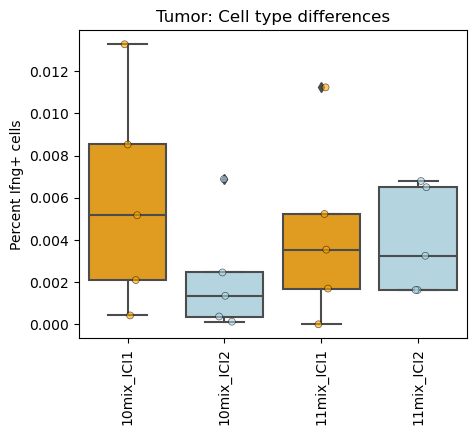

In [33]:
g=sns.boxplot(y=y, x=x, data=data, palette=["orange","lightblue"])#kind="box",
sns.stripplot(y=y, x=x, data=data, palette=["orange","lightblue"], dodge=True, alpha=0.6, edgecolor="black", linewidth=0.5)


g.figure.set_figwidth(5)
g.figure.set_figheight(4)
g.set_title("Tumor: Cell type differences")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel("Percent Ifng+ cells")
g.set_xlabel("")

In [34]:
x="condition"
y='percent'
hue="condition"

Text(0.5, 23.52222222222222, '')

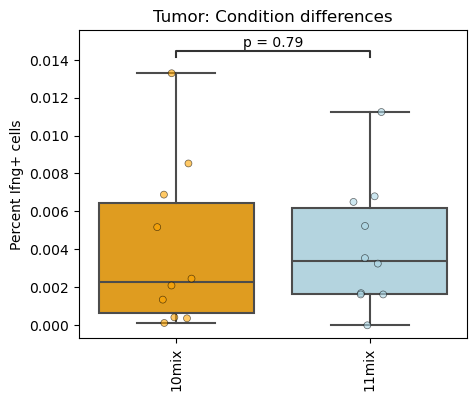

In [35]:
g=sns.boxplot(y=y, x=x, data=data, palette=["orange","lightblue"])#kind="box",
sns.stripplot(y=y, x=x, data=data, palette=["orange","lightblue"], dodge=True, alpha=0.6, edgecolor="black", linewidth=0.5)

add_stat_annotation(g, data=data, x=x, y=y, 
                    box_pairs=[("10mix","11mix"),
                    
                          
                                ],
                   test='Mann-Whitney', text_format='simple', loc='inside', verbose=0)#, comparisons_correction='bonferroni')


g.figure.set_figwidth(5)
g.figure.set_figheight(4)
g.set_title("Tumor: Condition differences")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel("Percent Ifng+ cells")
g.set_xlabel("")

In [36]:
x="sample_id"
y='percent'
hue="sample_id"

Text(0.5, 0, '')

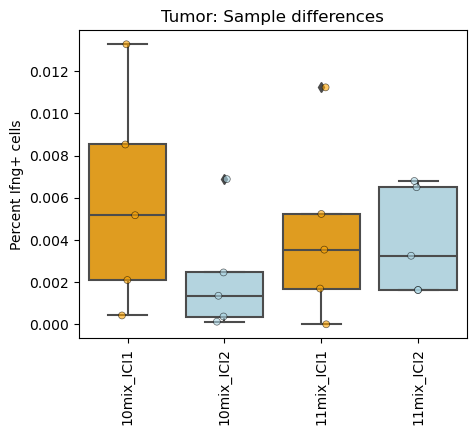

In [37]:
g=sns.boxplot(y=y, x=x, data=data, palette=["orange","lightblue"])#kind="box",
sns.stripplot(y=y, x=x, data=data, palette=["orange","lightblue"], dodge=True, alpha=0.6, edgecolor="black", linewidth=0.5)



g.figure.set_figwidth(5)
g.figure.set_figheight(4)
g.set_title("Tumor: Sample differences")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel("Percent Ifng+ cells")
g.set_xlabel("")

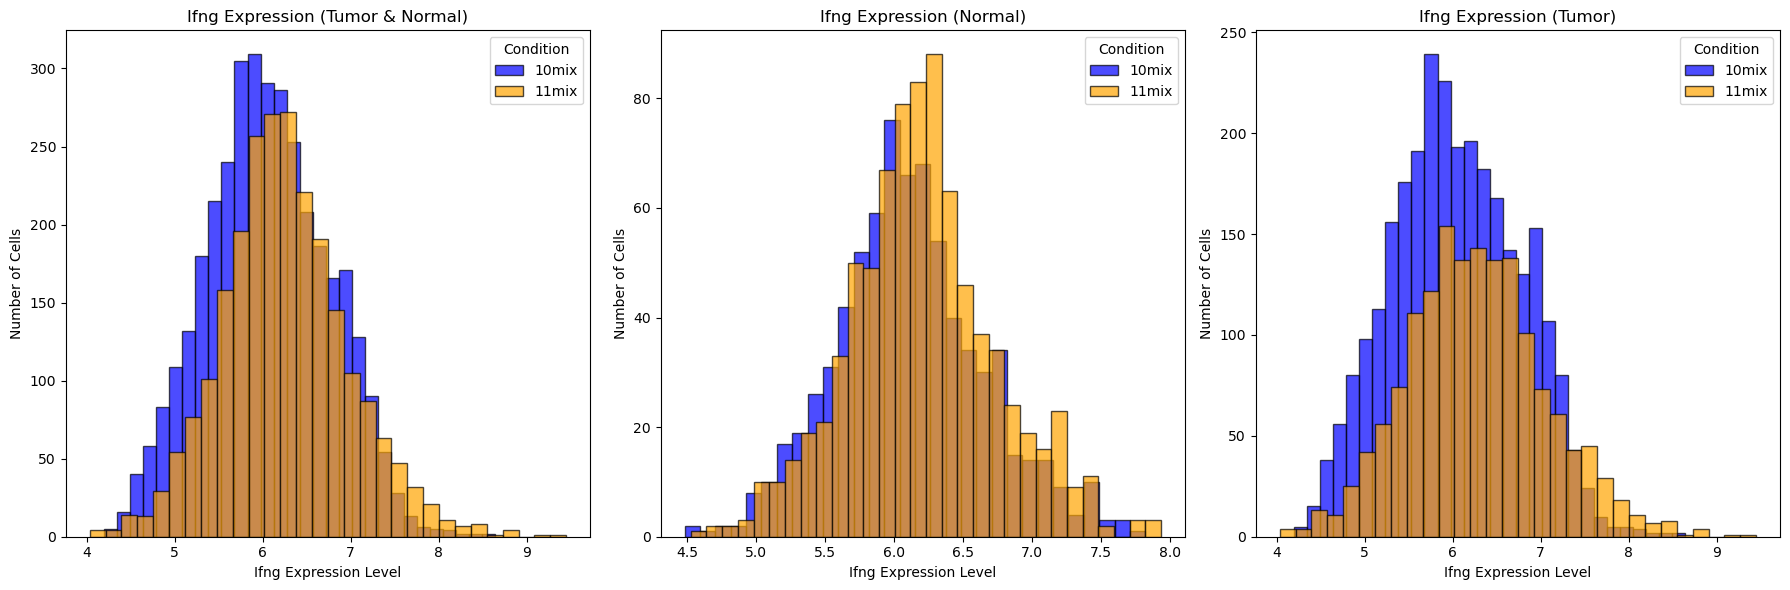

In [32]:
import matplotlib.pyplot as plt

# Define a function to extract Ifng expression levels for a given dataset
def extract_ifng_expression(adata, gene='ENSMUSG00000055170', threshold=0):
    if gene in adata.var_names:
        ifng_expression = (
            adata[:, gene].X.toarray().flatten()
            if hasattr(adata[:, gene].X, "toarray")
            else adata[:, gene].X.flatten()
        )
        # Filter cells that express Ifng based on the threshold
        return ifng_expression[ifng_expression > threshold], adata.obs['condition'][ifng_expression > threshold]
    else:
        return None, None

# Extract Ifng expression levels and conditions for each dataset
ifng_expression_adata, condition_adata = extract_ifng_expression(adata)
ifng_expression_normal, condition_normal = extract_ifng_expression(adata[adata.obs['sample_id'].isin(["10mix1", "11mix1", "10mix2", "11mix2"])])
ifng_expression_tumor, condition_tumor = extract_ifng_expression(adata[adata.obs['sample_id'].isin(["10mix_ICI1", "11mix_ICI1", "10mix_ICI2", "11mix_ICI2"])])

# Create a figure with 3 subplots
plt.figure(figsize=(18, 6))

# Plot histogram for adata, colored by condition
plt.subplot(1, 3, 1)
plt.hist(ifng_expression_adata[condition_adata == '10mix'], bins=30, edgecolor='black', alpha=0.7, label='10mix', color='blue')
plt.hist(ifng_expression_adata[condition_adata == '11mix'], bins=30, edgecolor='black', alpha=0.7, label='11mix', color='orange')
plt.title('Ifng Expression (Tumor & Normal)')
plt.xlabel('Ifng Expression Level')
plt.ylabel('Number of Cells')
plt.legend(title="Condition")

# Plot histogram for adata_normal, colored by condition
plt.subplot(1, 3, 2)
plt.hist(ifng_expression_normal[condition_normal == '10mix'], bins=30, edgecolor='black', alpha=0.7, label='10mix', color='blue')
plt.hist(ifng_expression_normal[condition_normal == '11mix'], bins=30, edgecolor='black', alpha=0.7, label='11mix', color='orange')
plt.title('Ifng Expression (Normal)')
plt.xlabel('Ifng Expression Level')
plt.ylabel('Number of Cells')
plt.legend(title="Condition")

# Plot histogram for adata_tumor, colored by condition
plt.subplot(1, 3, 3)
plt.hist(ifng_expression_tumor[condition_tumor == '10mix'], bins=30, edgecolor='black', alpha=0.7, label='10mix', color='blue')
plt.hist(ifng_expression_tumor[condition_tumor == '11mix'], bins=30, edgecolor='black', alpha=0.7, label='11mix', color='orange')
plt.title('Ifng Expression (Tumor)')
plt.xlabel('Ifng Expression Level')
plt.ylabel('Number of Cells')
plt.legend(title="Condition")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



In [38]:
adata.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,value,outlier,mt_outlier,ribo_outlier,leiden_res0_25,leiden_res0_5,leiden_res1,functional.cluster,Ifng_expression,ifng
AAACCTGAGTTAAGTG_1_10mix1,0,0,0,1,CD8_NaiveLike,10mix,singlet,False,False,False,...,0,False,False,False,4,4,6,NaN,0,neg
AAACCTGCAGGATCGA_1_10mix1,0,0,0,1,CD8_Tex,10mix,singlet,False,False,False,...,0,False,False,False,3,3,2,NaN,0,neg
AAACCTGCATAACCTG_1_10mix1,0,0,0,1,CD8_Tex,10mix,singlet,False,False,False,...,0,False,False,False,3,3,14,NaN,0,neg
AAACCTGCATACCATG_1_10mix1,0,0,0,1,CD8_EarlyActiv,10mix,singlet,False,False,False,...,0,False,False,False,3,3,2,NaN,0,neg
AAACCTGGTGTGCCTG_1_10mix1,0,0,0,1,CD8_NaiveLike,10mix,singlet,False,False,False,...,0,False,False,False,3,3,2,NaN,0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTATGACA_1_11mix_ICI2,0,0,3,ICI2,CD8_NaiveLike,11mix,singlet,False,False,False,...,0,False,False,False,1,1,8,CD8_NaiveLike,0,neg
TTTGTCACAGGTTTCA_1_11mix_ICI2,0,0,3,ICI2,CD8_NaiveLike,11mix,singlet,False,False,False,...,0,False,False,False,1,1,8,CD8_NaiveLike,0,neg
TTTGTCACATAGTAAG_1_11mix_ICI2,0,0,3,ICI2,CD8_EffectorMemory,11mix,singlet,False,False,False,...,0,False,False,False,3,3,2,CD8_EffectorMemory,1,pos
TTTGTCAGTCTGGTCG_1_11mix_ICI2,0,0,3,ICI2,CD8_Tex,11mix,singlet,False,False,False,...,0,False,False,False,2,5,9,CD8_Tex,0,neg


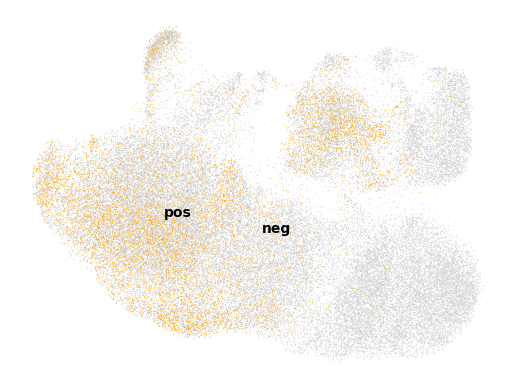

In [48]:
adata.obs["IFNGexpression"]=adata.obs["ifng"].replace({True:"Pos",False:"Neg"})
sc.pl.umap(adata, color="IFNGexpression", palette=[ 'lightgrey', 'orange'],  legend_loc='on data', title='', frameon=False)


/tmp/ipykernel_1120857/2735277047.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_normal.obs["IFNGexpression"]=adata_normal.obs["ifng"].replace({True:"Pos",False:"Neg"})


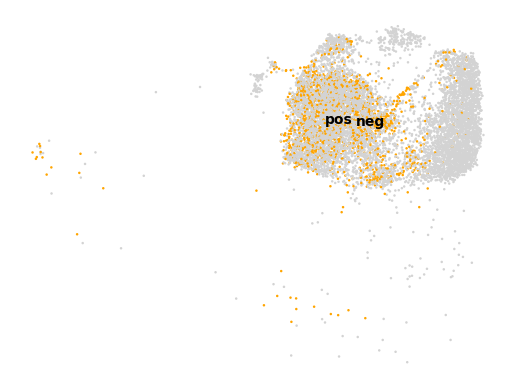

In [50]:
adata_normal.obs["IFNGexpression"]=adata_normal.obs["ifng"].replace({True:"Pos",False:"Neg"})
sc.pl.umap(adata_normal, color="IFNGexpression", palette=[ 'lightgrey', 'orange'],  legend_loc='on data', title='', frameon=False)


/tmp/ipykernel_1120857/3767218711.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_tumor.obs["IFNGexpression"]=adata_tumor.obs["ifng"].replace({True:"Pos",False:"Neg"})


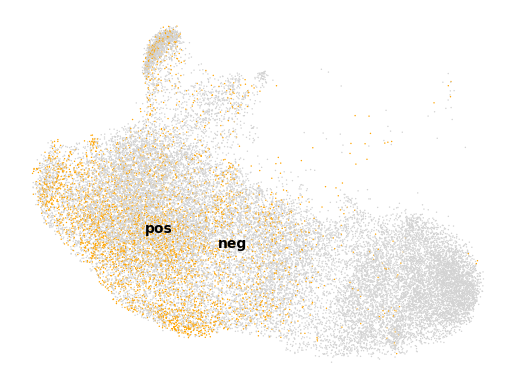

In [51]:
adata_tumor.obs["IFNGexpression"]=adata_tumor.obs["ifng"].replace({True:"Pos",False:"Neg"})
sc.pl.umap(adata_tumor, color="IFNGexpression", palette=[ 'lightgrey', 'orange'],  legend_loc='on data', title='', frameon=False)


In [53]:
genes=[ "Ccr7",
"Il7r",
"Sell",
"Tcf7",
"Txk",
"S1pr1",
"Lef1",
"Satb1"]

In [ ]:
siggb=adata.obs[genes+["MSI","IFNG_expressed"]
          ].groupby(["MSI","IFNG_expressed"]).mean()

In [52]:
g=sns.clustermap(siggb.transpose(), cmap="RdYlBu_r", standard_scale=0, center=0.5,figsize=(4,11),
               yticklabels=True, col_cluster=True)

ValueError: DataFrame constructor not properly called!